# Знакомство с данными


У нас есть следующий набор данных из 119390 строк и 21 колонки

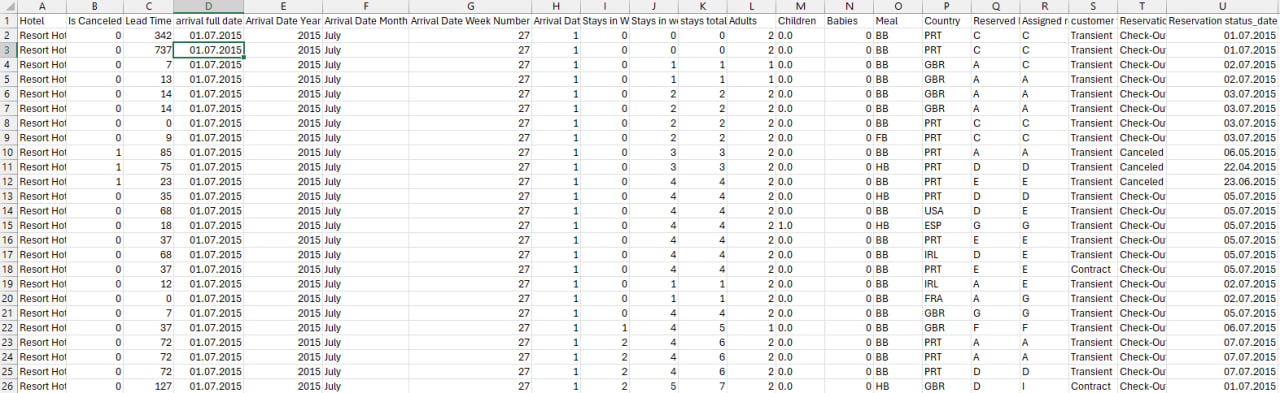

Значение переменных:

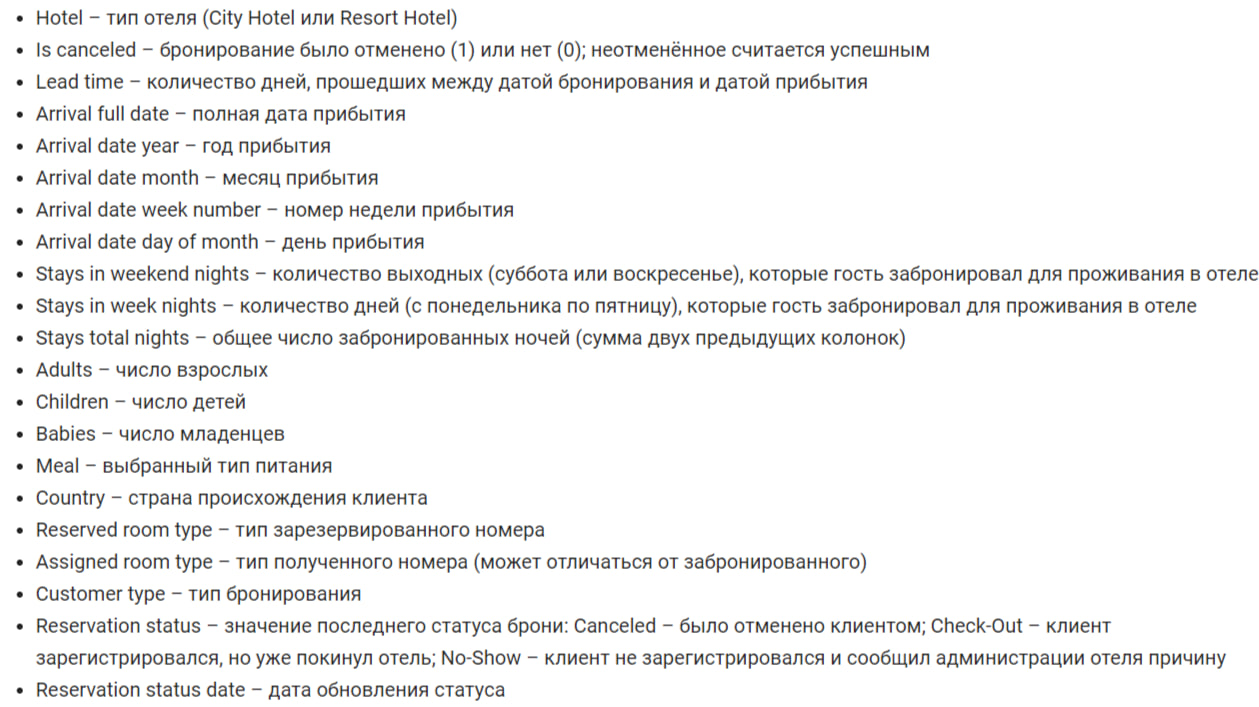

1) Узнаем пользователи из каких стран совершили наибольшее число бронирований?

In [1]:
# импортируем нужные библиотеки
import pandas as pd



df = pd.read_csv('https://stepik.org/media/attachments/lesson/360344/bookings.csv',  sep=';')
print(df.head())


          Hotel  Is Canceled  Lead Time arrival full date  Arrival Date Year  \
0  Resort Hotel            0        342        2015-07-01               2015   
1  Resort Hotel            0        737        2015-07-01               2015   
2  Resort Hotel            0          7        2015-07-01               2015   
3  Resort Hotel            0         13        2015-07-01               2015   
4  Resort Hotel            0         14        2015-07-01               2015   

  Arrival Date Month  Arrival Date Week Number  Arrival Date Day of Month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   Stays in Weekend nights  Stays in week nights  ...  A

Преобразуем названия столбцов в нормальный вид (lower_letters)

In [2]:
cols_name =df.columns
new_cols = []
for name in cols_name:
    try:
        as_sp = name.split()
        as_str = '_'.join(as_sp)
        new_cols.append(as_str.lower())
    except:
        new_cols.append(name.lower())

df.columns = new_cols

# Пользователи из каких стран совершили наибольшее число бронирований?

In [ ]:
succesful_bookings = df[df['is_canceled']== 0]
group_by_bookings = succesful_bookings.groupby('country')['is_canceled'].count()
print(group_by_bookings.sort_values(ascending=False).head())

country
PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
Name: is_canceled, dtype: int64


1 Португалия \
2 Великобритания \
3 Франция \
4 Испания \
5 Германия \





# На сколько ночей в среднем бронируют городские отели и курортные?

In [ ]:
resorts = df[df['hotel'] == 'Resort Hotel']
cities = df[df['hotel'] == 'City Hotel']
print(f"Среднее число ночей в городских отелях: {round(cities['stays_total_nights'].mean(), 2)}")
print(f"Среднее число ночей в курортных отелях: {round(resorts['stays_total_nights'].mean(), 2)}")

Среднее число ночей в городских отелях: 2.98
Среднее число ночей в курортных отелях: 4.32


# Посмотрим в какой  месяц в каждом году спрос был наивысшим

In [ ]:
booked = df[df['is_canceled'] == 0]
a = booked.groupby(['arrival_date_year','arrival_date_month'])['is_canceled'].count().to_frame()
def sort_months_within_year(group):
    return group.sort_values('is_canceled', ascending=False)

sorted_grouped = a.groupby('arrival_date_year', group_keys=False).apply(sort_months_within_year)
print(sorted_grouped)

                                      is_canceled
arrival_date_year arrival_date_month             
2015              October                    3225
                  September                  3020
                  August                     2291
                  December                   1947
                  November                   1854
                  July                       1517
2016              October                    3689
                  May                        3563
                  September                  3372
                  April                      3367
                  March                      3347
                  August                     3238
                  June                       3196
                  July                       3073
                  November                   2818
                  February                   2554
                  December                   2462
                  January                    1691


Заметим, что Октябрь и Сентябрь в предыдущие года отличались высоким спросом.Значит есть основания предполагать, что в 2017 это повториться


# Посчитаем коэффициент оттока клиентов (Churn Rate)

Churn rate (отток, коэффициент оттока) – это процент подписчиков (например, на push-уведомления от сайта), которые отписались от канала коммуникации, отказались от услуг сервиса в течение определенного периода времени. Иными словами, представляет собой отношение количества ушедших пользователей к общему количеству пользователей, выраженное в процентах.

В нашем случае Churn Rate - это процент клиентов, которые отменили бронирование.


Рассчитаем Churn Rate по каждому году

In [4]:
def mine(ser: pd.Series):
    as_list = ser.to_list()
    only_canceled = list(filter(lambda x: x ==1, as_list))
    return len(only_canceled)/ len(as_list)


groupped_by_year = df.groupby('arrival_date_year')['is_canceled'].apply(mine)
percentage_series = groupped_by_year.apply(lambda x: f"{x * 100:.1f}%")
print(percentage_series)

arrival_date_year
2015    37.0%
2016    35.9%
2017    38.7%
Name: is_canceled, dtype: object


# Оценим влияние того факта, берет ли клиент с собой ребенка, на то что он отмениит бронь

Зададимся вопросом, а связан ли отказ от брони с тем что клиент планирует взять с собой детей

Для начала посчитаем долю оттока у двух групп(с детьми и без детей)

In [8]:
#создаем новый столблец, отражающий и детей и малышей
df['total_kids'] = df['children'] + df['babies']
# создаем новый столблец, отражающий есть ли дети ( в том числе малыши)
df['has_kids'] = df['total_kids'] >=1
#датафрейм первой группы
with_kids = df[df['has_kids']]
#датафрейм второй группы
without_kids =df[df['has_kids'] ==False]

#считаем churn rate первой группы
quantity_with_kids = with_kids[with_kids['is_canceled'] == 1]['hotel'].count()
churn_rate_with_kids = quantity_with_kids / with_kids.shape[0]
print(f"{churn_rate_with_kids * 100:.1f}%")

#считаем churn rate второй группы
quantity_without_kids = without_kids[without_kids['is_canceled'] == 1]['hotel'].count()
churn_rate_without_kids = quantity_without_kids / without_kids.shape[0]
print(f"{churn_rate_without_kids * 100:.1f}%")

34.9%
37.2%


Заметим, что доля оттока у клиентов с детьми больше, но не значительно. Но важно провести тест для проверки, являются ли различия статистически значимыми

Так как речь идет о пропорциях, а не о средних значениях, то разумно использовать Z-тест  для пропорций.

Пускай нулевая гипотеза : различий между пропорциями двух групп в генеральной свовкупности  нет

Альтернативная гипотеза:  между пропоцриями двух групп существуют различия в генеральрной совокупности

In [10]:
from statsmodels.stats.proportion import proportions_ztest

# Пропорции и размеры выборок
count = [quantity_with_kids, quantity_without_kids]  # количество успешных случаев (отменённых билетов)
nobs = [with_kids.shape[0], without_kids.shape[0]]  # размеры выборок

# Z-тест для пропорций
z_stat, p_value = proportions_ztest(count, nobs)

print(f"Z-статистика: {z_stat}")
print(f"p-значение: {p_value}")


Z-статистика: -4.414434338675782
p-значение: 1.0127444789719431e-05


заметим, что p-value < 0.05, значиь у  нас есть оснвоания отклонить нулевую гипотезу

Значит отличия являются статистисески значимыим и мы имеем основания предполагать, что наличие ребенка повышает вероятность отказа от брони

Такой вывод может показаться неочевидным, ведь разнница на первый взгляд совсем небольшая, но большое влияние оказывакет значительная разниица в размерах выборок

In [11]:
print(f"кол-во броней (всех) с детьми: {with_kids.shape[0]}")
print(f"кол-во броней (всех) без детей: {without_kids.shape[0]}")

кол-во броней (всех) с детьми: 9332
кол-во броней (всех) без детей: 110058
